<a href="https://www.kaggle.com/code/sarahhudaib/linear-regression-e-commerce?scriptVersionId=92076985" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Lab: Exploratory Analysis with Linear Regressions
### Overview
I’ll perform exploratory analysis by using Linear Regressions on the Kaggle data set of E-Commerce



### Feature Tasks and Requirements

- [x] Select a Kaggle data set that is suitable for Linear Regression.
- [x] Load the data you receive into a Pandas DataFrame.
- [x] Show the first five rows of the data set.
- [x] Show the description and the info of the data set.
- [x] Ensure that any date columns have been cast into a datetime object in your DataFrame.
- [x] Using a regression model, split your data into train and test portions.
- [x] Fit your training split to the regression model.
- [x] Show your regression model’s score.
- [x] Draw at least three conclusions from your regression model.
- [x] Your notebook should be clutter free and polished.

In [1]:
# import all the lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df=pd.read_csv("../input/ecommerce/Ecommerce Customers")

In [3]:
df = df.drop(['Yearly Amount Spent','Email','Address','Avatar'], axis = 1)

In [4]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
count,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462
std,0.992563,0.994216,1.010489,0.999278
min,29.532429,8.508152,33.913847,0.269901
25%,32.341822,11.388153,36.349257,2.930450
50%,33.082008,11.983231,37.069367,3.533975
75%,33.711985,12.753850,37.716432,4.126502
max,36.139662,15.126994,40.005182,6.922689


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB


In [7]:
# independent
X = df['Avg. Session Length'].values
X

array([34.49726773, 31.92627203, 33.00091476, 34.30555663, 33.33067252,
       33.87103788, 32.0215955 , 32.73914294, 33.9877729 , 31.93654862,
       33.99257277, 33.87936082, 29.53242897, 33.19033404, 32.38797585,
       30.73772037, 32.1253869 , 32.33889932, 32.18781205, 32.61785606,
       32.91278511, 33.50308726, 31.53160448, 32.90325097, 34.507551  ,
       33.02933195, 33.54123131, 32.33598964, 33.11020506, 33.10543794,
       33.24190043, 33.4610563 , 32.17550124, 32.72836   , 32.82030995,
       33.61603789, 31.72165236, 32.86532717, 32.74936818, 32.56723048,
       32.07054622, 33.01954799, 33.79203908, 32.89398062, 32.04448613,
       34.55576799, 34.56455771, 32.7267846 , 33.11721873, 31.66104982,
       33.25633547, 33.90022441, 34.18777483, 33.76206924, 34.39016366,
       33.9252966 , 32.6882293 , 34.30187022, 32.84393022, 33.75499473,
       33.87978429, 33.07653561, 32.22729914, 32.78977262, 32.77260993,
       34.37425805, 33.07871721, 32.8052204 , 32.43075793, 32.17

In [8]:
#dependent
Y= df['Time on App'].values
Y

array([12.65565115, 11.10946073, 11.33027806, 13.71751367, 12.79518855,
       12.02692534, 11.36634831, 12.35195897, 13.38623528, 11.81412829,
       13.33897545, 11.584783  , 10.9612984 , 12.95922609, 13.14872569,
       12.63660605, 11.73386169, 12.01319469, 14.71538754, 13.98959256,
       11.36549203, 12.8779837 , 13.37856278, 11.65757592, 12.8936695 ,
       11.76581265, 12.78389178, 13.00781942, 11.98204499, 11.96502   ,
       12.30541781, 10.86916381, 13.38749211, 13.10450724, 11.63489325,
       11.9363865 , 11.7550237 , 11.98441752,  9.95497597, 12.48901322,
       11.73310622, 10.63456132, 12.50752537, 11.52987821, 13.41493474,
       12.17052542, 13.14655143, 12.98851015, 11.86412636, 11.39806419,
       13.85806246, 10.95679097, 10.32011626,  9.9845144 , 12.64519514,
       11.58865542, 13.76153285, 10.56829469, 11.83228622, 12.06415663,
       12.4955916 ,  9.60731469, 13.72862718, 11.67006592, 13.27631301,
       15.12699429, 12.69578975, 11.83547609, 11.30623234, 11.18

In [9]:
#Training Data / Model --> 80% picked randomly for training
# Test the Data / Model --> 20% for testing

x_train, x_test ,y_train, y_test = train_test_split(X,Y, train_size = 0.8, test_size=0.2 , random_state = 15)

x_train ,y_train

#Numpy
x_train=x_train.reshape(-1,1)
x_train
x_test=x_test.reshape(-1,1)
x_test


array([[34.35719627],
       [33.9252966 ],
       [34.00648892],
       [33.63781168],
       [34.87849495],
       [33.17720467],
       [32.11640012],
       [33.74922777],
       [32.40429505],
       [33.46869995],
       [33.45961932],
       [31.8530748 ],
       [33.55210836],
       [33.9877729 ],
       [32.58249357],
       [32.40237102],
       [32.04448613],
       [34.53665918],
       [34.46151474],
       [33.19033404],
       [34.72908017],
       [34.19550803],
       [33.59852032],
       [34.40240965],
       [31.97648006],
       [33.41906735],
       [32.31290975],
       [32.60928264],
       [31.57613197],
       [33.39826013],
       [33.01479222],
       [30.87948434],
       [31.93654862],
       [33.7709001 ],
       [31.65480968],
       [33.71755461],
       [32.87273861],
       [32.35147815],
       [32.84393022],
       [32.34279623],
       [32.87847437],
       [32.69239222],
       [32.72852076],
       [32.72836   ],
       [32.30274837],
       [33

In [10]:
# creat our linear regression model

model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [11]:
# Predict the output based on the regression model

y_predict= model.predict(x_test.reshape(-1,1))
y_predict


array([12.03444112, 12.03845176, 12.03769781, 12.04112136, 12.02960031,
       12.04539859, 12.05524927, 12.04008675, 12.05257587, 12.04269174,
       12.04277607, 12.05769453, 12.04191721, 12.03787161, 12.0509211 ,
       12.05259373, 12.05591707, 12.03277462, 12.03347241, 12.04527667,
       12.03098779, 12.03594257, 12.04148623, 12.03402127, 12.05654858,
       12.04315264, 12.05342447, 12.05067234, 12.06026623, 12.04334585,
       12.04690676, 12.06673534, 12.05691938, 12.0398855 , 12.05953563,
       12.04038087, 12.04822587, 12.05306633, 12.04849339, 12.05314695,
       12.04817261, 12.04990058, 12.04956509, 12.04956658, 12.05351883,
       12.04237242, 12.05588616, 12.04544384, 12.03773883, 12.05022674,
       12.04885285, 12.03645436, 12.03873644, 12.04297841, 12.0398956 ,
       12.06298412, 12.03222565, 12.05358849, 12.03887833, 12.06404218,
       12.04677174, 12.05576452, 12.0507331 , 12.03828627, 12.05232938,
       12.04572476, 12.04192146, 12.05559706, 12.06504676, 12.04

In [12]:
train_accuracy = model.score(x_train,y_train)
train_accuracy

8.599718942070567e-05

In [13]:
test_accuracy= model.score(x_test,y_test)
test_accuracy

0.0010345564706593091

In [14]:
# Given a spacific session-time how much time i'll stay on the app

new_data = np.array([34.305557]).reshape(-1,1)
new_data

array([[34.305557]])

In [15]:
model.predict(new_data)

array([12.03492065])

Text(0.5, 1.0, 'Time length data')

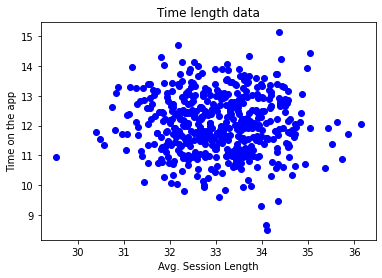

In [16]:
# plot visual analyzing
# X and Y / scatter diagram
%matplotlib inline 
plt.scatter(X,Y, color='blue')
plt.xlabel('Avg. Session Length')
plt.ylabel('Time on the app')
plt.title('Time length data')

Text(0.5, 1.0, 'Actual Data vs Predicted Data')

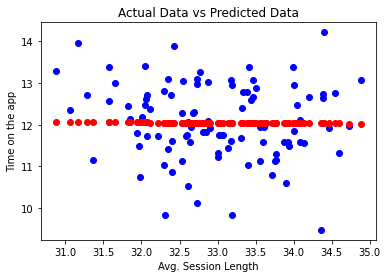

In [17]:

plt.scatter(x_test,y_test, color='blue')
plt.scatter(x_test,y_predict, color='red')

plt.xlabel('Avg. Session Length')
plt.ylabel('Time on the app')
plt.title('Actual Data vs Predicted Data')

<Figure size 720x720 with 0 Axes>

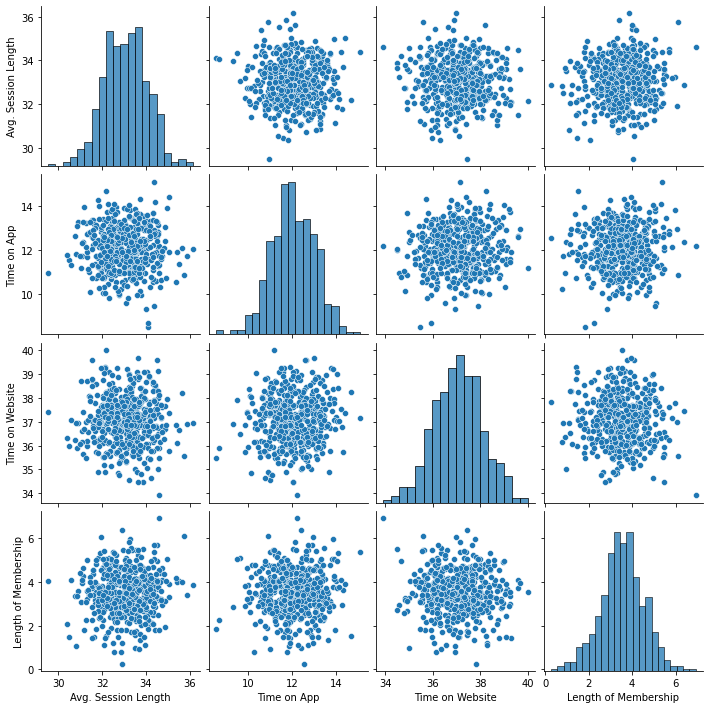

In [18]:
plt.figure(figsize = (10,10))
sns.pairplot(data = df)
plt.show()